# Formalia:

Please read the [assignment overview page](https://github.com/lalessan/comsocsci2022/wiki/Assignments) carefully before proceeding. This page contains information about formatting (including formats etc), group sizes, and many other aspects of handing in the assignment. 

_If you fail to follow these simple instructions, it will negatively impact your grade!_

**Due date and time**: The assignment is due on March 1st at 23:55. Hand in your Jupyter notebook file (with extension `.ipynb`) via DTU Learn _(Course Content, Assignemnts, Assignment 1)_. 

Remember to include in the first cell of your notebook:
* the link to your group's Git repository
* group members' contributions

Link: https://github.com/DrJupiter/comsci-assignment/blob/main/Assignment1.ipynb
    
Contributions: We all worked equally on the assignment, thus the single commit doesn't reflect the actual work distribution.

Participants: s204123, s204160, s202192

# Part 1: Datasets for Computational Social Science

_Ten characteristics of Big Data._ Consider the dataset you have collected in Week 1, and think of the *10 characteristics of Big Data* from the book [Bit by Bit section 2.3](https://www.bitbybitbook.com/en/1st-ed/observing-behavior/characteristics/).
> * **Big**. How large is this data (approximately)? Could you collect the same amount of information via surveys?

Our dataset contains 14284 submissions whose title contains Gamestop or GME and a total of 636447 comments were found in the submissions. To collect this amount of data via survey would have been extremely expensive and time consuming. And thus for us given our resources would have been near impossible.

> * **Always-on**. Can you keep collecting data over time?

This dataset is a good example of an always-on datasource. It was collected before people started having an interest in it, since almost no one cared about redditors' communication about Gamestop shares before they successfully short squeezed hedge-funds. With reddit-data we can go back in time and continue to collect data indefinitely.

> * **Non-reactive**. Is the dataset non-reactive?

Partially, us collecting submissions and comments doesn’t influence the subsequent or current comments or submissions made. More generally past submissions and comments won’t change unless the authors go back and do so before a post is archived. 
As such, the process of scraping reddit-data is non-reactive, since it does not influence how the people observed behave. However, people aren’t completely themselves, as WallStreetBets en encourages “memey” behavior and thus doesn’t perfectly reflect real world personalities or interactions. 

> * **Incomplete**. Do you think the dataset captures entirely the unfolding of events leading to the GME stock rise in price? 

Whether the dataset is incomplete depends on how one views the goal of the analysis. If what interests us is how strangers coordinate over the internet to manipulate the stock market - i.e. our theoretical construct that we wish to operationalize is something like “spontaneous online non-hierarchical financial coordination”, then arguably our dataset is reasonably complete. However, if what we want to study is the empirical development of the GME stock price, then our dataset is not complete, since we e.g. do not have any information on the actions of the opposing party (the hedge-funds).

> * **Inaccessible**. Is the data accessible? 

The data is accessible to everyone who is able to employ the required scraping-tools such as the PushShiftAPI.





> * **Non-representative**. Do you think that the conclusions we will draw by analyzing this dataset are specific to the GME events? Or could they instead help us understand social phenomena more in general? If yes, which phenomena could you think of? Of not, what are the aspects that make this dataset non-representative?

In this case we have a systematic bias towards people who use reddit. This group is an incomplete reflection of reality and thus cannot be used to draw all kinds of conclusions. [Mainly young male individuals](https://medium.com/@sm_app_intel/the-user-demographics-of-reddit-the-official-app-7e2e18b1e0e1)
The data was further skewed in the beginning as the subreddit mainly consisted of people who knew something about the stock market, before the “memey” nature came into play, and the idea started to spread to everyone on reddit.
 
The data might help us further understand social phenomena like group mentality, the cascading effect of information spread through hype or rising economic-power awareness in young people.

> * **Drifting**. Is there any source of *drift* in this dataset (within the period observed)? 

To our knowledge the way comments and submissions work didn’t change over the period we measure, and thus don’t experience drift in their form. However, there is drift within who made submissions and comments. To start GME was not a meme in the format it became and thus the general public of the subreddit weren’t commenting on the issue. After GME took off this changed and thus the dataset experiences drift in terms of who interacted with it.

> * **Algorithmically confounded**. Is the dataset algorithmically confounded? If yes, why?


Reddit’s interface works in such a way that popular posts get more exposure. As such, there will be a critical point where a post gets enough upvotes to land on the frontpage of reddit. This algorithmic function is probably a contributing factor to why GME posts on r/wallstreetbets exploded in their reach in January 2021. For this reason, the dataset can be said to be algorithmically confunded. 

> * **Dirty**. What aspect may make this dataset *dirty*?

We have not conducted any analysis to investigate whether the dataset is dirty and we can therefore not say with any certainty whether it is. One aspect that may make it dirty would be if a significant number of posts (not likely) or comments (very likely) are made by bots. 

> * **Sensitive**. Is there any sensitive information in the data?

Reddit is a public platform and its users are aware of this. Thus anything posted to reddit by a user is done with their own consent and is thus not sensitive. In some cases the data might be sensitive if a user has revealed their actual name and e.g. income. However, in our opinion the researcher need not take steps to circumvent any potential issues arising from this, since the user has consented to making the information public as already stated.


# Part 2: activity on Reddit and GME prices



Consider the following datasets: 
 * the *GME market data*, that you can download from [here](https://finance.yahoo.com/quote/GME/history/). 
 * the dataset you downloaded in Week1, Exercise 2. We will refer to this as the _comments dataset_.

> _Part 2.1 : Plotting prices and comments using line-graphs._
> 1. Plot the daily volume of the GME stock over time using the _GME market data_. On top of the daily data, plot the rolling average, using a 7 days window (you can use the function [``pd.rolling``](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.rolling.html)). Use a [log-scale on the y-axis](https://matplotlib.org/3.1.1/api/_as_gen/matplotlib.pyplot.yscale.html).





In [1]:
import numpy as np
import pandas as pd
import matplotlib.dates as mdate
from scipy.stats import pearsonr
from scipy import stats
import matplotlib.pyplot as plt

vol_data = pd.read_csv('../files/GME.csv',parse_dates=['Date']).set_index('Date')

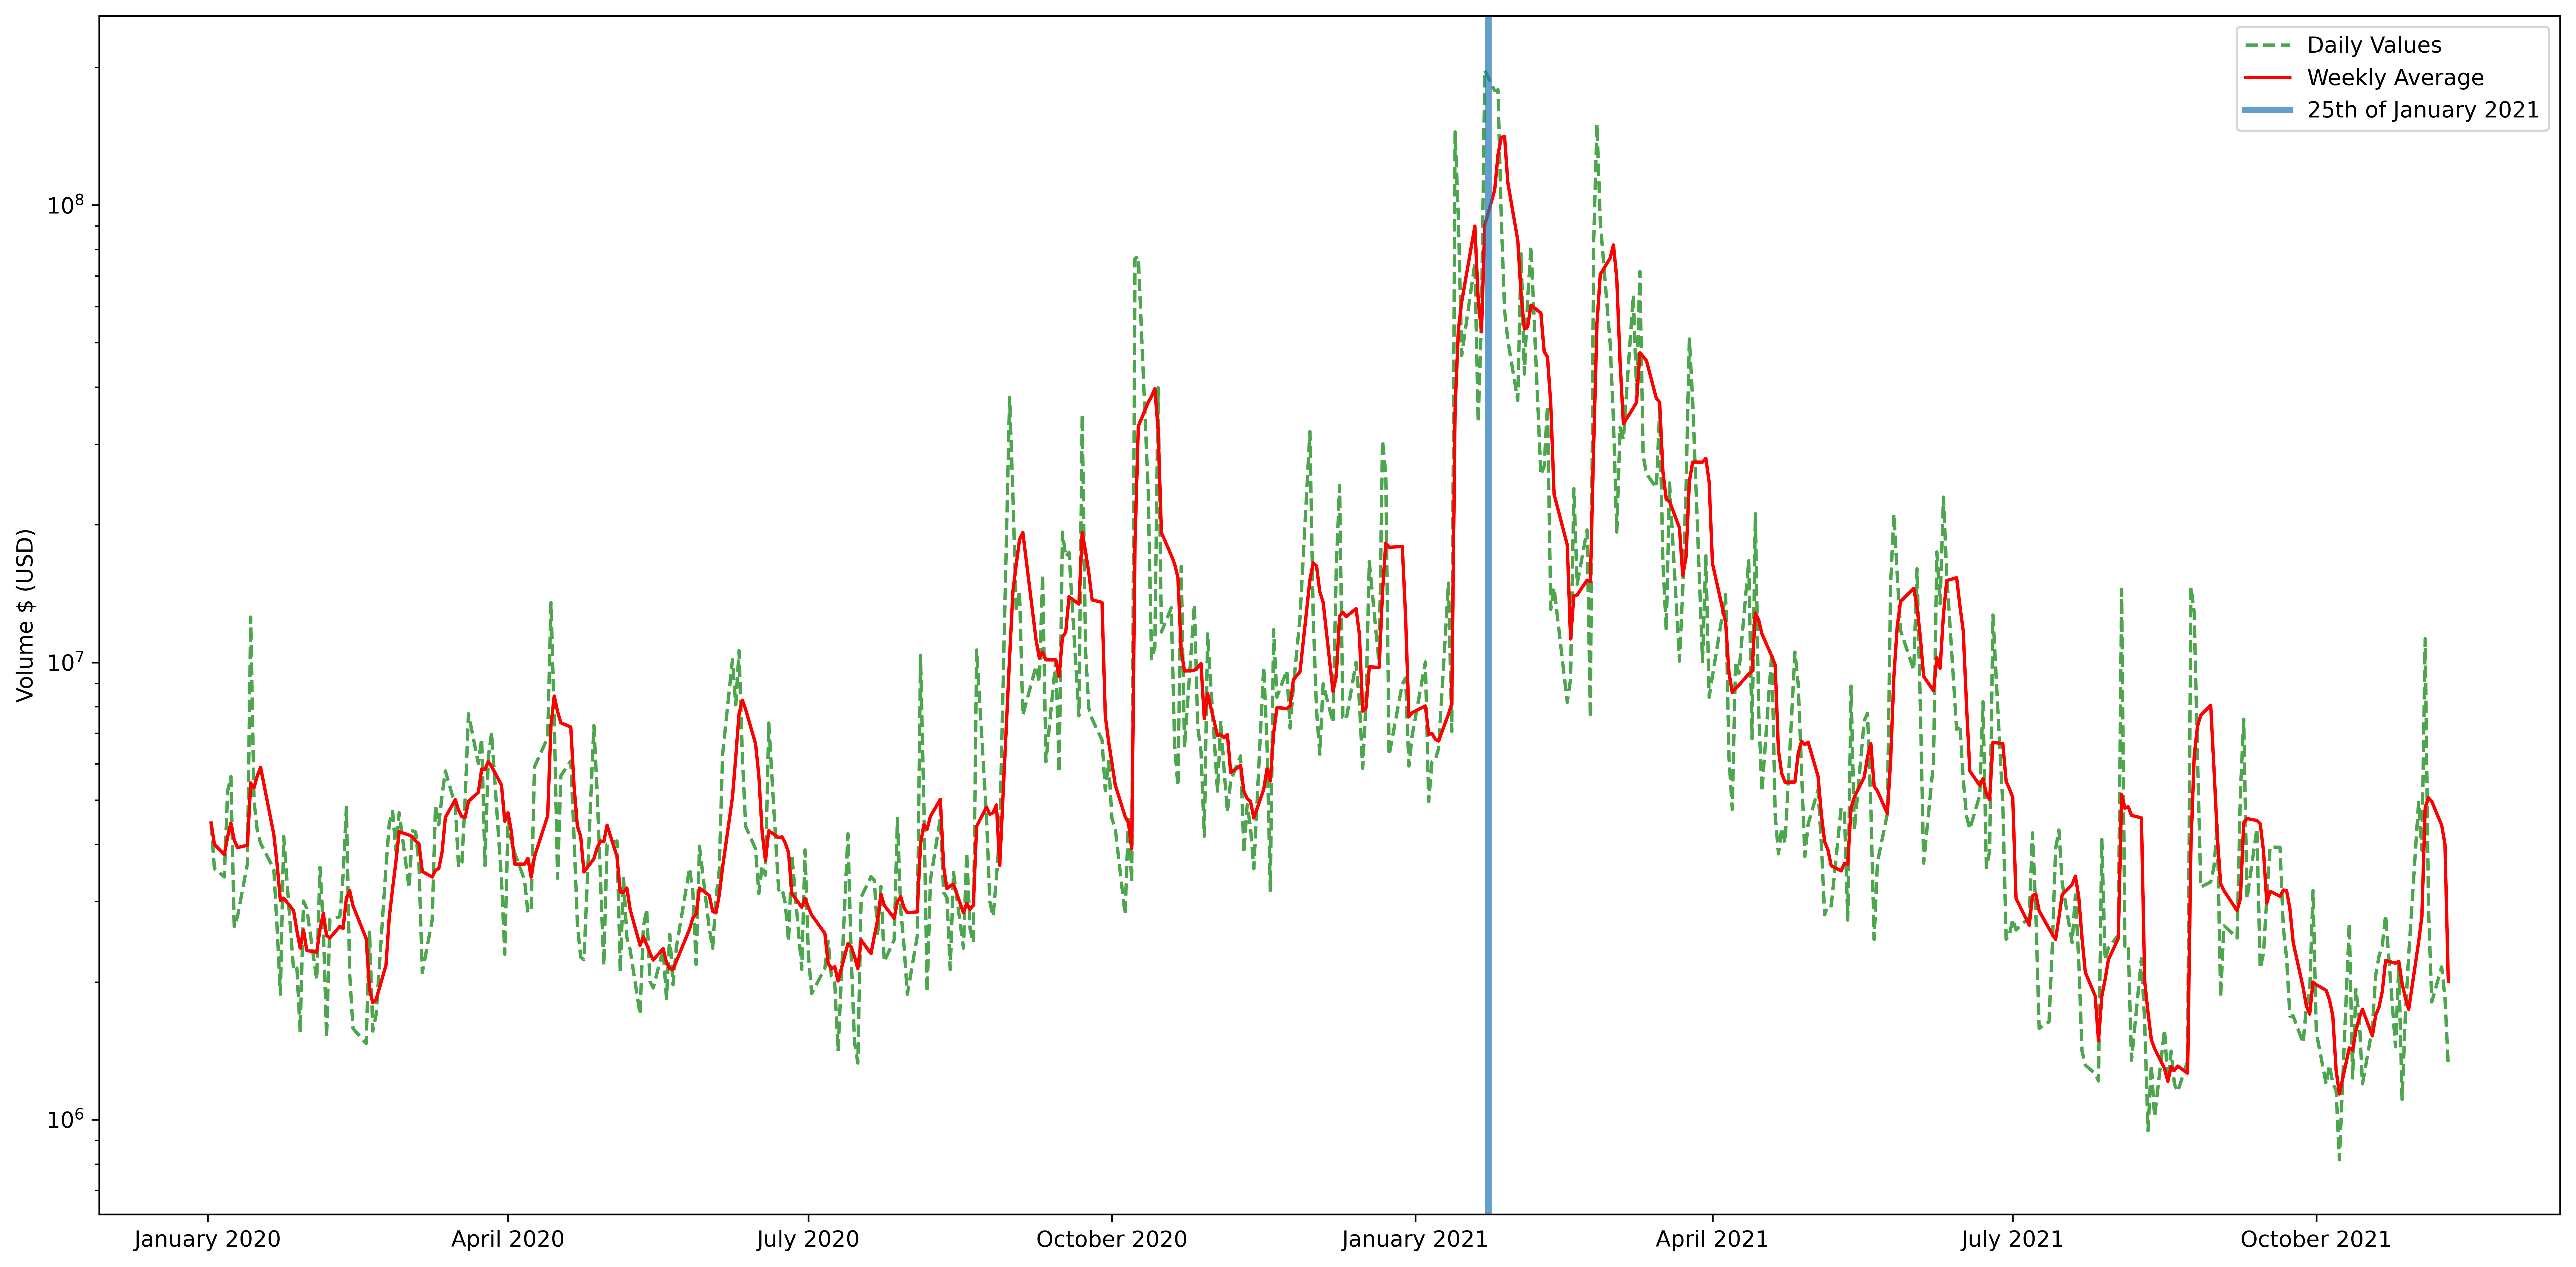

In [20]:

fig, ax = plt.subplots(figsize=(20,10),dpi=600)

rolled = vol_data.Volume.rolling('7D').mean()

ax.plot(vol_data.index, vol_data.Volume,'--',alpha=0.7,color='green',label='Daily Values')

ax.set_ylabel('Volume $ (USD)')
ax.set_yscale('log')
ax.plot(rolled.index,rolled.values, color='red',label='Weekly Average')
date_fmt = mdate.DateFormatter('%B %Y')
ax.xaxis.set_major_formatter(date_fmt)
ax.axvline(18650, alpha=0.7,linewidth=3,label="25th of January 2021")
ax.legend()
plt.show()

> 2. Now make a second plot where you plot the total number of comments on Reddit per day. Follow the same steps you followed in step 1.

In [2]:
import pickle

post_data = pd.read_pickle('../files/Wall_street_dataframe.pkl')
comment_data = pd.read_pickle('../files/com_comments.pkl')

import datetime as dt

post_data['created'] = [dt.datetime.utcfromtimestamp(ts) for ts in post_data['created']]
post_data['created'] = pd.to_datetime(post_data['created'])
post_data.set_index('created')

comment_data['created'] = [dt.datetime.utcfromtimestamp(ts) for ts in comment_data['created']]
comment_data['created'] = pd.to_datetime(comment_data['created'])

comments_per_day = comment_data.groupby(comment_data['created'].dt.date).size()

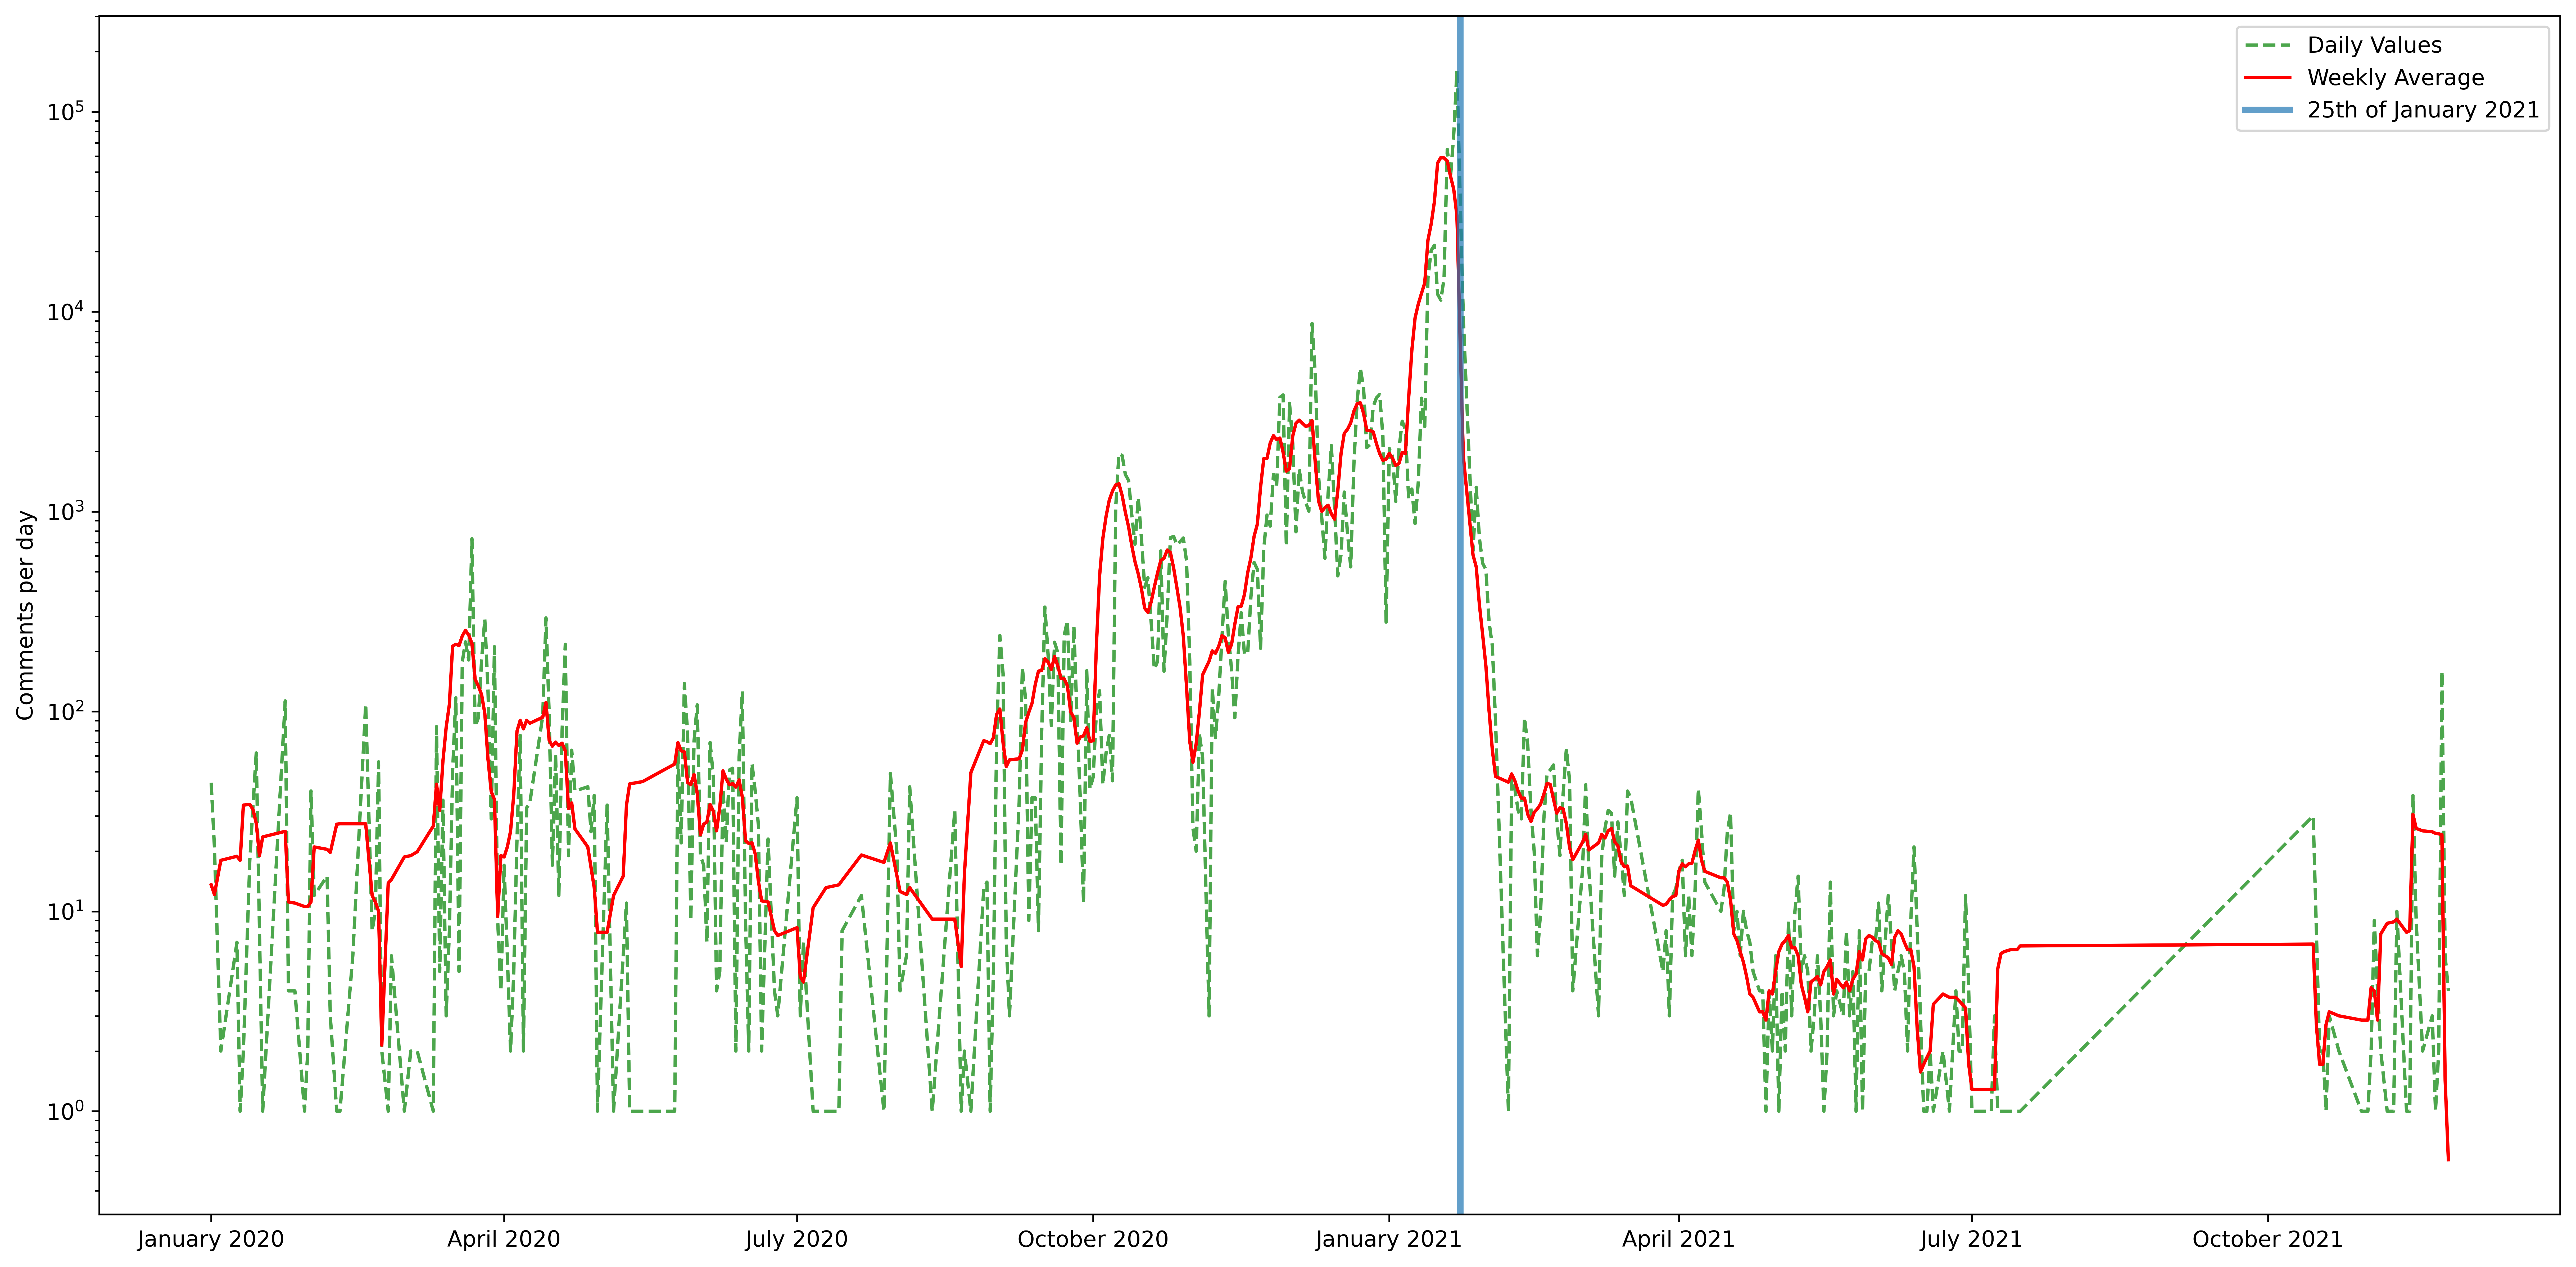

In [21]:
fig, ax = plt.subplots(figsize=(20,10),dpi=600)
n = 7
rolled = np.convolve(comments_per_day.values,[1/n]*n,'full')[n-1:]

ax.plot(comments_per_day,'--',alpha=0.7,color='green',label='Daily Values')
ax.set_ylabel('Comments per day')
ax.set_yscale('log')
ax.plot(comments_per_day.index,rolled, color='red',label='Weekly Average')
date_fmt = mdate.DateFormatter('%B %Y')
ax.xaxis.set_major_formatter(date_fmt)
ax.axvline(18650, alpha=0.7,linewidth=3,label="25th of January 2021")
ax.legend()
plt.show()

Our data continues until mid October both for GME market value and comments. This is because for posts made in the period January 1st 2020 - January 25th 2021 the latest comments on those posts are from then. The blue line indicates where our primary area of interest stops, so the 25th of January 2021.

> 3. What is the advantage of using the log-scale on the y-axis? What is the advantage of using a rolling-window?

A log-scale is often used when conveying information on a variable that has a very large range of values. This will enable the viewer to see finer trends in the data. However, an issue can also be that the viewer is more likely to misinterpret the data, since it can be hard to comprehend just how much growth is contained in a positive linear trend on a log scale. 
A rolling-window is a convenient way of smoothing out a function line such that the underlying trend becomes more apparent. 


> 4. Now take a minute to __look at these two figures__. Then write in a couple of lines: What are the three most important observations you can draw by looking at the figures?

Firstly there seems to be a positive correlation between the volume of the GME stock and the number of comments per day in the period between January 1st 2020 and January 25th 2021. However the volume of the two differ significantly as well as the smoothness of the data. The relative volatility of the amount of reddit comments per day is higher, swinging usually by a factor between 10^2 and 10^3, while the volume of GME usually doesn’t swing by more than 10^1. In terms of short term trends, the amount of comments on reddit about GME look to also rise when GME is doing poorer such as around November 2020 where the stock price fell a significant amount, but the amount of comments on reddit on the posts about GME saw a rise.


> _Part 2.2: Returns vs number of comments using scatter-plots_.
> In this part of the assignment, we will look at the association between GME market indicators and the volume of comments on Reddit. 
> 1. Compute the daily log-returns as ``np.log(Close_price(t)/Close_price(t-1))``, where ``Close_price(t)`` is the Close Price of GME on day t. You can use the function [pd.Series.shift](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.shift.html). Working with log-returns instead of regular returns is a standard thing to do in economics, if you are interested in why, check out [this blog post](https://quantivity.wordpress.com/2011/02/21/why-log-returns/).







In [3]:
daily_returns = np.log(vol_data.Close.values[1:]/vol_data.Close.values[0:-1])

> 2. Compute the daily log-change in number of new comments as ``np.log(comments(t)/comments(t-1))`` where ``comments(t)`` is the number of comments on day t. 

In [4]:
# Check if there are any days where there are no comments
# in order to prevent dividing by 0
sum(comments_per_day.values == 0)

0

In [5]:
comment_return = np.log(comments_per_day.values[1:]/comments_per_day.values[0:-1])


> 3. Compute the correlation coefficient (find the formula in the Data Visualization book, section 12.2) between the series computed in step 1 and step 2 (note that you need to first remove days without any comments from the time-series). Is the correlation statistically significant? 

In [6]:
"""
Since the dates nor amount of daily returns match the comment returns of the bat (469 to 444),
this is corrected for by matching the dates.
"""

np_comment_per_day = np.array([np.datetime64(date) for date in comments_per_day.index.values])
sim = [[i, np.where(np_comment_per_day[i] == vol_data.index.values)[0]] for i in range(0,np_comment_per_day.shape[0])]
sim = np.array(sim)
sim = np.array([x for x in sim if len(x[1]) != 0])
com_idx, vol_idx = sim[:,0].astype('int'), sim[:,1].reshape(-1).astype('int')

<ipython-input-6-3e4f3ae69de6>:3: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  sim = np.array(sim)


In [10]:
print(f"In the end we end up with {len(vol_idx)} = {len(com_idx)} number of daily and comment returns")

In the end we end up with 307 = 307 number of daily and comment returns


In [13]:
import scipy
# We remove the last index, since it's for the last day for which we have no daily return.
m_com_ret, m_daily_ret = comment_return[com_idx[:-1]],daily_returns[vol_idx[:-1]]
lin_cor = np.corrcoef(m_com_ret, m_daily_ret)
spear_cor = scipy.stats.spearmanr(m_com_ret, m_daily_ret)
print(f"Linear Correlation: {lin_cor[0,1]}. Spearman Correlation: {spear_cor[0]}.\np-value {spear_cor[1]}")

Linear Correlation: 0.16669599083809875. Spearman Correlation: 0.17702807371820234.
p-value 0.0018794979730238797


There is a positive correlation with a 95% confidence level between the amount of comment returns on a given day and the value of the daily returns.

> 4. Make a [scatter plot](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.scatter.html) of the daily log-return on investment for the GME stock against the daily log-change in number of comments. Color the markers for 2020 and 2021 in different colors, and make the marker size proportional to the Close price. 

In [34]:
# Get the index which is first from 2021 in the data points we look at.
from_idx = np.where(np_comment_per_day[com_idx[:-1]].astype('str').astype('U4') == '2021')[0][0]
from_idx = np.where(com_idx[:-1] == from_idx)[0][0]

In [86]:
fig, ax = plt.subplots(figsize=(20,10),dpi=600)

scat1 = ax.scatter( comment_return[com_idx[:from_idx]],daily_returns[vol_idx[:from_idx]], alpha=0.7,color='green', label ='2020 Daily return vs Comment return')
scat2 = ax.scatter( comment_return[com_idx[from_idx:-1]],daily_returns[vol_idx[from_idx:-1]], alpha=0.7,color='purple', label ='2021 Daily return vs Comment return')
ax.set_ylabel('$\log [{USD_{t+1}}/{USD_{t}} ]$')
ax.set_yscale('log')
ax.legend()

fig.canvas.draw()

def min_max(daily_returns):
    return (daily_returns - daily_returns.min())/(daily_returns.max() - daily_returns.min())
    
norm_dr = min_max((vol_data.Close.values[1:]))

#norm_dr1, norm_dr2 = min_max(vol_data.Close.values[1:][vol_idx[:from_idx]]), min_max(vol_data.Close.values[1:][vol_idx[from_idx:-1]])
#norm_dr1, norm_dr2 = norm_dr1/10, norm_dr2/10
norm_dr1, norm_dr2 = norm_dr[vol_idx[:from_idx]], norm_dr[vol_idx[from_idx:-1]]

#### This piece of code was modified from https://stackoverflow.com/a/40446435 
rr_pix = (ax.transData.transform(np.vstack([norm_dr1, norm_dr1]).T) -
          ax.transData.transform(np.vstack([np.zeros(len(norm_dr1)), np.zeros(len(norm_dr1))]).T))
rpix, _ = rr_pix.T
#size_pt = (2*rpix/(fig.dpi)*100)**2
size_pt = rpix
scat1.set_sizes(size_pt)

rr_pix = (ax.transData.transform(np.vstack([norm_dr2, norm_dr2]).T) -
          ax.transData.transform(np.vstack([np.zeros(len(norm_dr2)), np.zeros(len(norm_dr2))]).T))
rpix, _ = rr_pix.T
size_pt = rpix
#size_pt = (2*rpix/fig.dpi*72)**2

scat2.set_sizes(size_pt)
####


plt.show()

> 5. Now take a minute to __look at the figure you just prepared__. Then write in a couple of lines: What are the three most salient observations you can draw by looking at it? 

The 2020 data doesn't look to be correlated and the data from 2021 to be slightly positively correlated.
The closing price of the stock in 2021 is also much larger, specifically by a factor 10-100, compared to the closing prices in 2020. The variance in relative size between the points in 2020 and 2021 themselves is about the same.

> 6. Based on the exploratory data visualization in Exercises 2 and 3, what can you conclude on the research question: *Is the activity on wallstreetbet related to the price of the GME stock?*

We found that there was a slight but significant positive correlation of ca. 0.177 between the daily returns and the comments, which reflected itself in the graphs over the data.
In the form of a visual correlation. Thus the activity on wallstreetbets was related to the price of the GME stock.
_Which perhaps makes sense in terms of demand of a product rising with an increased discourse about it_

#  Part 3: Exercises using the `NetworkX` library

> Solve the following exercises from your [Network Science book](http://networksciencebook.com).
> * Go to Section 2.12: [Homework](http://networksciencebook.com/chapter/2#homework2), then




>     * Write the solution for exercise 2.1 (the 'Königsberg Problem') from NS in your notebook.

We know that for a drawing to be made using only one “stroke” it must have 0-2 nodes with uneven number of edges. If there are any more, it isn’t possible.
Based on this we can see that A is possible, B is impossible (4 nodes with an uneven number of edges), C is possible (every node has an even number of edges) and D is possible (1 node with uneven number of edges).

>     * Solve exercise 2.3 ('Graph representation') from NS using NetworkX in your notebook. (You don't have to solve the last sub-question about cycles of length 4).

In [34]:
# We define the two directed and undirected graphs

import networkx as nx

uG = nx.Graph()
uG.degree

nodes = [1,2,3,4,5,6]
edges = [(1,2),(1,3),(1,4),(1,6),
        (2,3),(2,4),
        (3,6)]

uG.add_nodes_from(nodes)

for x,y in edges:
    uG.add_edge(x,y)

dG = nx.DiGraph()
dG.degree

nodes = [1,2,3,4,5,6]
edges_di = [(1,2)
        ,(2,3),(2,4)
        ,(3,1),(3,2)
        ,(4,1)
        ,(6,1),(6,3)]

dG.add_nodes_from(nodes)

for x,y in edges_di:
    dG.add_edge(x,y)
    
print(uG)
print(dG)

Graph with 6 nodes and 7 edges
DiGraph with 6 nodes and 8 edges


In [35]:
# We then define the corresponding adjacency matrices

print("undirected graph adj M: \n",nx.adjacency_matrix(uG).todense())
print("directed graph adj M: \n",nx.adjacency_matrix(dG).todense())

undirected graph adj M: 
 [[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]
directed graph adj M: 
 [[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]]


In [38]:
# We define the correponding edge lists
    
def generate_adjlist_with_all_edges(G, delimiter=" "):
     for s, nbrs in G.adjacency():
        line = str(s) + delimiter
        for t, data in nbrs.items():
                line += str(t) + delimiter
        yield line[: -len(delimiter)]

        
print('\nUndirected Graph\n')
for line in generate_adjlist_with_all_edges(uG):
    print(line[:])

print('\nDirected Graph\n')
    
for line in nx.generate_adjlist(dG):
    print(line[:])



Undirected Graph

1 2 3 4 6
2 1 3 4
3 1 2 6
4 1 2
5
6 1 3

Directed Graph

1 2
2 3 4
3 1 2
4 1
5
6 1 3


In [39]:
# The average clustering coefficient

print("avg clustering value for the undirected graph",
        sum(nx.clustering(uG).values())/len(uG.nodes))

print("avg clustering value for the directed graph",
        sum(nx.clustering(dG).values())/len(dG.nodes))

avg clustering value for the undirected graph 0.6388888888888888
avg clustering value for the directed graph 0.32222222222222224


In [40]:
# Switch 5 and 6
def edge_mutal_replace(list,val1,val2):
    mutated_list = list
    for i, edge in enumerate(list):
        if edge[0] == val1:
            mutated_list[i] = (val2,edge[1])
        if edge[0] == val2:
            mutated_list[i] = (val1,edge[1])
        if edge[1] == val1:
            mutated_list[i] = (edge[0],val2)
        if edge[1] == val2:
            mutated_list[i] = (edge[0],val1)

    return mutated_list

uG_s = nx.Graph()
uG_s.degree
uG_s.add_nodes_from(nodes)
for x,y in edge_mutal_replace(edges,5,6):
    uG_s.add_edge(x,y)

dG_s = nx.Graph()
dG_s.degree
dG_s.add_nodes_from(nodes)
for x,y in edge_mutal_replace(edges_di,5,6):
    dG_s.add_edge(x,y)

print("undirected graph adj M: \n",nx.adjacency_matrix(uG).todense(),"\n->\n",nx.adjacency_matrix(uG_s).todense())
print(" ")
print("directed graph adj M: \n",nx.adjacency_matrix(dG).todense(),"\n->\n",nx.adjacency_matrix(dG_s).todense())

undirected graph adj M: 
 [[0 1 1 1 0 1]
 [1 0 1 1 0 0]
 [1 1 0 0 0 1]
 [1 1 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]] 
->
 [[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]
 
directed graph adj M: 
 [[0 1 0 0 0 0]
 [0 0 1 1 0 0]
 [1 1 0 0 0 0]
 [1 0 0 0 0 0]
 [0 0 0 0 0 0]
 [1 0 1 0 0 0]] 
->
 [[0 1 1 1 1 0]
 [1 0 1 1 0 0]
 [1 1 0 0 1 0]
 [1 1 0 0 0 0]
 [1 0 1 0 0 0]
 [0 0 0 0 0 0]]


> What kind of information can you not infer from the link list representation of the network that you can infer from the adjacency matrix?

The two representations provide the same information. However, it can be easier to visually gauge the level of sparsity of the network in the adjacency matrix representation.



> In the (a) network, how many paths (with possible repetition of nodes and links) of length 3 exist starting from node 1 and ending at node 3? And in (b)?

In [43]:

def get_moves(graph, x):
    return [act for state,act in graph.edges(x)]

possible_movesets = []
for act1 in get_moves(uG,1):
    for act2 in get_moves(uG,act1):
        for act3 in get_moves(uG,act2):
            possible_movesets.append([1,act1,act2,act3])

counter = 0
for move_set in possible_movesets:
    if move_set[-1] == 3:
        counter += 1
        # print(move_set)
print(f"The number of paths for 3 steps: {counter}")

#%%



The number of paths for 3 steps: 7


> With the help of a computer, count the number of cycles of length 4 in both networks.

In [44]:
possible_movesets = []
for act1 in get_moves(uG,1):
    for act2 in get_moves(uG,act1):
        for act3 in get_moves(uG,act2):
            for act4 in get_moves(uG,act3):
                possible_movesets.append([1,act1,act2,act3,act4])

counter = 0
for move_set in possible_movesets:
    if move_set[-1] == 3:
        counter += 1
        # print(move_set)
print(f"The number of paths for 4 steps: {counter}")

The number of paths for 4 steps: 19


>     * Solve exercise 2.5 ('Bipartite Networks') from NS using NetworkX in your notebook.

> Construct its adjacency matrix. Why is it a block-diagonal matrix?

In [46]:
# Bipartite

G = nx.Graph()

nodes = [1,2,3,4,5,6,7,8,9,10,11]
edges = [(1,7),
        (2,9),
        (3,7),(3,8),(3,9),
        (4,9),(4,10),
        (5,9),(5,11),
        (6,11)]

G.add_nodes_from(nodes)
G.add_edges_from(edges)

#nx.adjacency_matrix(G).todense()

<img src="../files/blockgraph.png" alt="Drawing" style="width: 500px;"/>

It is a block-diagonal matrix due to the way the nodes are ordered, which in turn follows from the definition of bipartite networks, whose nodes “can be divided into two disjoint sets”. 



In the given graph, the nodes 1-6 are defined as not being connected, which corresponds to the purple block of 0’s in the adjacency matrix. Similarly for nodes 7-11 and the green block in the adjacency matrix. 


> Construct the adjacency matrix of its two projections, on the purple and on the green nodes, respectively.

In [51]:
B = nx.project(G,nodes)

B_am = nx.adjacency_matrix(B)

proj_purple_G = nx.from_numpy_matrix(B_am.todense()[:6,:6])
proj_green_G = nx.from_numpy_matrix(B_am.todense()[6:,6:])
print('Purple\n\n',nx.adjacency_matrix(proj_purple_G).todense(),'\n')
print('Green\n\n',nx.adjacency_matrix(proj_green_G).todense())

Purple

 [[0 0 1 0 0 0]
 [0 0 1 1 1 0]
 [1 1 0 1 1 0]
 [0 1 1 0 1 0]
 [0 1 1 1 0 1]
 [0 0 0 0 1 0]] 

Green

 [[0 1 1 0 0]
 [1 0 1 0 0]
 [1 1 0 1 1]
 [0 0 1 0 0]
 [0 0 1 0 0]]


> Calculate the average degree of the purple nodes and the average degree of the green nodes in the bipartite network.

In [52]:
degrees = [y for _,y in list(G.degree)]
print("avg degrees purple",sum(degrees[:6])/6,"\navg degrees green",sum(degrees[6:])/5)

avg degrees purple 1.6666666666666667 
avg degrees green 2.0


> Calculate the average degree in each of the two network projections. Is it surprising that the values are different from those obtained in point (c)?

In [53]:
degrees_purple = [y for _,y in list(proj_purple_G.degree)]
degrees_green = [y for _,y in list(proj_green_G.degree)]

print("avg degrees projection purple",sum(degrees_purple)/6,"\navg degrees projection green",sum(degrees_green)/5)

avg degrees projection purple 2.6666666666666665 
avg degrees projection green 2.0


It is not surprising that the average degree differs for the original representation and the two different projections. Calculating the degree in the two projections u (green) and v (purple) give us the number of connections once removed, whereas the degree of the original representation is the number of connections directly. The fact that the graph is bipartite also explains why it flips which subset of nodes has the highest degree in the projections (purple) vs. in the original representation (green), since calculating the degree once removed is proportional to the average degree of the other disjoint subset.

### Bipartite Networks - General Considerations

> Consider a bipartite network with N1 and N2 nodes in the two sets.

We assume that the bipartite graph is undirected in the following exercises

> What is the maximum number of links Lmax the network can have?

$L_{max} = N1\cdot N2$

> How many links cannot occur compared to a non-bipartite network of size N = N1 + N2 ?


$L_{no} = \frac{N^2}{2} - N1 \cdot N2$

> If $N1<<N2$ , what can you say about the network density, that is the total number of links over the maximum number of links, $L_{max}$?

If N1 << N2, then $L_{max}$ is lower than if N1 = N2. The bigger the inequality the lower the density will be, since there is a big inequality we get low density. 
 
 
> Find an expression connecting N1, N2 and the average degree for the two sets in the bipartite network, 〈k1〉 and 〈k2〉.

If N1 < N2 then $E(avg(<k1>)) > E(avg(<k2>) )$ and conversely the opposite holds.


# Part 4: Properties of the real-world network of Redditors

For this part of the assignment, consider the directed network of redditors posting about GME on r/wallstreetbets in the period included between Jan 1st and Dec 31st, 2020 (the one you built in Week 3, Part 3).

> _Part 4.1 Random Network_: Create a Random Network as a null model to investigate some properties of the Redditors Network.
> * Compute the value of _p_ such that the number of expected edges of the random network equals the number of edges in the redditor network (see equation 3.2 in your Network Science Book). What is the value of p? Compute the average value of the degree < k > (using the formula).








In [1]:
import networkx as nx
import json
import re
from networkx.readwrite import json_graph

def read_json_file(filename):
    with open(filename) as f:
        js_graph = json.load(f)
    return json_graph.node_link_graph(js_graph)


G = read_json_file('../files/json_graph.json')

In [2]:
new_edges = []
for x,y,w in list(G.edges(data = "weight")):
    if not x == y:
        new_edges.append((x,y,w))

Gn = nx.DiGraph()
Gn.add_weighted_edges_from(new_edges)
del new_edges

In [3]:
len(Gn.edges)
V = len(Gn.nodes)
E = len(Gn.edges)
N = ((V*(V-1))/2)
p = E/N
print(p)

0.00016580586889420923


In [14]:
1/E

2.8128920468290267e-06

In [13]:
k = p * (E-1)
print(k)

58.94481542123585


The p value is 0.00017 which is above the critical point ($\frac{1}{N} = 2.813\cdot 10^{-6}$) and therefore the graph is in the “supercritical regime”.

The average value of the degree k is 58.94, which corresponds to each author on average having commented on 59 threads.

> * Create a Random network with the same number of nodes as the redditor networks, and _p_ as computed above. Generate a random network by linking nodes in every possible pair with probability _p_.

In [4]:
Gr = nx.generators.random_graphs.fast_gnp_random_graph(V,p)

In [15]:
abs(len(Gr.edges)-E)
# The amount of edges in the two networks are approximately the same

250

> * Visualize the Redditors Network and the Random Network. Comment on the differences between the two.

In [ ]:
from netwulf import visualize

G2 = Gn.to_undirected(reciprocal=True)

weights= []
for edge in G2.edges():
    #print(G.get_edge_data(edge[0], edge[1], default=0)["weight"])
    weight = (Gn.get_edge_data(edge[0], edge[1], default=0)["weight"]) + (Gn.get_edge_data(edge[1], edge[0], default=0)["weight"])
    weights.append(weight)

for count, e in enumerate(G2.edges()):
    G2[e[0]][e[1]]["weight"] = weights[count]


remove = [node for node,degree in dict(G2.degree()).items() if degree <= 1]


G2.remove_nodes_from(remove)

visualize(G2)

remove = [node for node,degree in dict(Gr.degree()).items() if degree <= 1]

Gr.remove_nodes_from(remove)

visualize(Gr)

<img src="../files/network.png" alt="Drawing" style="width: 800px;"/>

# Reddit

<img src="../files/networkr.png" alt="Drawing" style="width: 800px;"/>

# Random



The random network has the same average number of edges, but the distribution is very different. In the real network, there are a few authors that have a lot of connections while most have very few. Also, the same group of redditors are more likely to comment on each other (e.g. people that were engaged in the same thread), which means that the clustering coefficient is relatively high.
Conversely, in the random network all nodes are equally likely to be connected. This results in a much less ordered graph with a lower clustering coefficient, which is visually more cluttered than the real network.


> _Part 4.2 Clustering_: Compare the clustering coefficient in the Redditors Network and its random counterpart.
> * Compute the clustering coefficient for all nodes in the random network, using the formula 2.15 in your book.  

In [ ]:
def get_moves(graph, x):
    return [act for _,act in graph.edges(x)]

def get_triangles(graph,x):
    c = 0
    prior_connectins = []
    for act1 in get_moves(graph,x):
        for act2 in get_moves(graph,act1):
            if act2 in get_moves(graph,x):
                if (act1,act2) not in prior_connectins:
                    c+=1
                    prior_connectins.append((act2,act1))
                    # print(prior_connectins)
    return c


def clustering_l(graph):
    cluster_c_l = []
    for node in graph.nodes():
        l = get_triangles(graph,node)        
        k = graph.degree[node]
        if k > 1:
            cluster_c_l.append(2*l/(k*(k-1)))
        else:
            cluster_c_l.append(0)
    return cluster_c_l

cc_l_r = clustering_l(rG)
avg_rG = sum(cc_l_r)/len(cc_l_r)



> * Compute the average clustering across nodes of the random network. Is it consistent with the analytical prediction (network science book equation 3.21)?

In [56]:
print(avg_rG)

0.00015471601805979837

Theoritically expect $C_i = p$ which in our case, in practice, is approximately the case.
The difference between them is ca. $10^{-5}$.

> * Compute the average clustering coefficient for the Redditors network. How does it compare to its random counterpart? Is it something you would expect? Why?

In [ ]:
cc_l = clustering_l(G2)

In [55]:
avg_G2 = sum(cc_l)/len(cc_l)
print(avg_G2)

0.0023344749133975525

The results match our expectations.
We can see that the clustering coefficient is higher for the real network. 
This is because certain individuals comment and are replied to much more than others.
While in the random network all edges occur with equal likelihood (regardless of which nodes/individuals we are concerned with).